# MultivariateStats

_git_: https://github.com/JuliaStats/MultivariateStats.jl           
_documentation_: http://multivariatestatsjl.readthedocs.io/en/latest/index.html

### Summary

Multivariate is a package providing many multivariate statistics functions, including regression, dimensionality extraction and feature selection methods.

These can be loosely divided into:

-  **Dimensionality reduction**: PCA, Probabilistic PCA, Classical MDS, Kernel PCA, Factor Analysis
-  **Statistical analysis**: CCA, LDA, Multi-class LDA
-  **Statistical preprocessing**: Data Whitening
-  **Multivariate regression**: OLS/LLSq, Ridge

**Important notice:** the package adopts the column major convetion, meaning that columns are observations, and rows are features/variables

### Details

| Test        | Results           
| ------------- |:-------------:|
| Package works | yes |
| Deprecations warnings      | No      |
| Compatible with JuliaDB | If targets transformed into array |
| Documentation | very good |
| Simplicity | good |



### Dimensionality reduction

Dimensionality reduction methods are a subset of general statistical methods, whereas in addition to providing information about the data, such as capturing the combination of features that capture the variance well, they allow the user to transform the data into a latent space of reduced dimensionality, where these dimensions are not simple observable features, but are a linear combination of multiple features. 

For instance, suppose the data being analysed is physical features of a group of people, some features might be entangled together, such as height and weight, therefore reducing the dimensionality. Since this can be done using multiple features and multipel subsets, one could imagine combinations of features such as _height & weight_, _skin colour & hair colour_ etc. to capture more information than _size of hand & eye colour_.

Techniques such as PCA will find these correlations, and create new features made of a linear combination of the original features. 


#### Sample code (from documentation)

In [ ]:
using MultivariateStats, RDatasets, Plots
plotly() # using plotly for 3D-interacive graphing

# load iris dataset
iris = dataset("datasets", "iris")

# split half to training set
Xtr = convert(Array,iris[1:2:end,1:4])'
Xtr_labels = convert(Array,iris[1:2:end,5])

# split other half to testing set
Xte = convert(Array,iris[2:2:end,1:4])'
Xte_labels = convert(Array,iris[2:2:end,5])

# suppose Xtr and Xte are training and testing data matrix,
# with each observation in a column

# train a PCA model, allowing up to 3 dimensions
M = fit(PCA, Xtr; maxoutdim=3)

# apply PCA model to testing set
Yte = transform(M, Xte)

# reconstruct testing observations (approximately)
Xr = reconstruct(M, Yte)

# group results by testing set labels for color coding
setosa = Yte[:,Xte_labels.=="setosa"]
versicolor = Yte[:,Xte_labels.=="versicolor"]
virginica = Yte[:,Xte_labels.=="virginica"]

# visualize first 3 principal components in 3D interacive plot
p = scatter(setosa[1,:],setosa[2,:],setosa[3,:],marker=:circle,linewidth=0, label="setosa", markersize=3)
scatter!(versicolor[1,:],versicolor[2,:],versicolor[3,:],marker=:circle,linewidth=0, label="versicolor", markersize=3)
scatter!(virginica[1,:],virginica[2,:],virginica[3,:],marker=:circle,linewidth=0, label="virginica", markersize=3)
plot!(p,xlabel="PC1",ylabel="PC2",zlabel="PC3")

![result](resources/pca.png)

### Classification using multivariate linear regression

Julia doesn't currently have any classification method using linear models, but using this library, an implementation is quite simple.

More information can be found regarding the theory in this [notebook](Linear%20Models%20%20for%20Regression%20%26%20Classification.ipynb)

In [5]:
using MultivariateStats
using StatsFuns
using Plots
pyplot()

# Linearly separable generating functions
f(x) = -x + 1 + 0.3*randn()
g(x) = -x - 1 + 0.3*randn()

# Generate points
N = 100
x = rand( Int(N/2)  ,1)
y_p = f.(x)
y_n = g.(x)

# Set up matrix
X = hcat(x,y_p)
X = vcat(X, hcat(x, y_n))

# Set up targets matrix
Y = zeros(N,2)

for i in 1:Int(N/2)
    Y[i,:] = [1,0]
end
for i in Int(N/2):N
    Y[i,:] = [0,1]
end

# Compute linear least square fit
a = llsq(X, Y; bias=false);


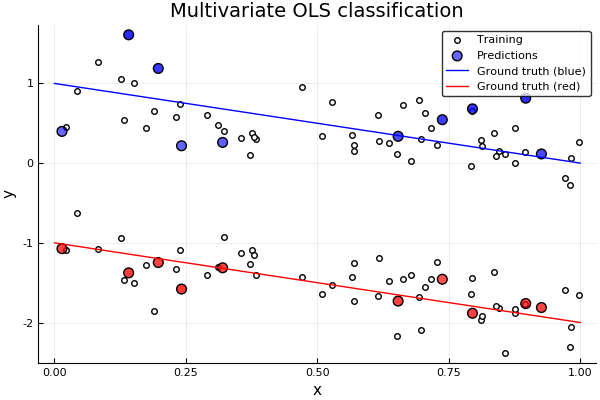

In [23]:
# Generate new points
xt = rand(10)
y_p = f.(xt)
y_n = g.(xt)

Xt = hcat(xt,y_p)
Xt = vcat(Xt, hcat(xt, y_n))


pred_proba = []
pred_class = []

# Compute classes and associated probabilities
for i in 1:size(Xt,1)
    # Use softmax to transform to probability
    push!(pred_proba, softmax( reshape(Xt[i,:], (1,2)) *a ) )
    
    # Certainty given by the probability
    certainty = maximum(pred_proba[i])

    # Prepare colours for plot
    if pred_proba[i][1] > pred_proba[i][2]
        push!(pred_class,RGBA(0,0,1, certainty))
    else
        push!(pred_class,RGBA(1,0,0, certainty))
    end
end


scatter(X[:,1], X[:,2], color="white", label="Training", 
    title="Multivariate OLS classification",
    xlabel="x",
    ylabel="y")

scatter!(Xt[:,1], Xt[:,2], color=pred_class, label="Predictions", markersize=7)
plot!([0,1], [1,0], label="Ground truth (blue)", color="blue")
plot!([0,1], [-1,-2], label="Ground truth (red)", color="red")

_Figure: opacity of colour relates to certainty of the prediction_